# TensorFlow Hub - Image classification

- Based on: https://www.tensorflow.org/hub/tutorials/tf2_image_retraining?hl=pt-br

# Importing the libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
print('TensorFlow version: ', tf.__version__)
print('TensorFlow Hub version: ', hub.__version__)

TensorFlow version:  2.8.2
TensorFlow Hub version:  0.12.0


# Setting the model

In [ ]:
# Other models: https://tfhub.dev/s?module-type=image-feature-vector&tf-version=tf2
model_name = 'efficientnetv2-xl-21k' # @param ['efficientnetv2-s', 'efficientnetv2-m', 'efficientnetv2-l', 'efficientnetv2-s-21k', 'efficientnetv2-m-21k', 'efficientnetv2-l-21k', 'efficientnetv2-xl-21k', 'efficientnetv2-b0-21k', 'efficientnetv2-b1-21k', 'efficientnetv2-b2-21k', 'efficientnetv2-b3-21k', 'efficientnetv2-s-21k-ft1k', 'efficientnetv2-m-21k-ft1k', 'efficientnetv2-l-21k-ft1k', 'efficientnetv2-xl-21k-ft1k', 'efficientnetv2-b0-21k-ft1k', 'efficientnetv2-b1-21k-ft1k', 'efficientnetv2-b2-21k-ft1k', 'efficientnetv2-b3-21k-ft1k', 'efficientnetv2-b0', 'efficientnetv2-b1', 'efficientnetv2-b2', 'efficientnetv2-b3', 'efficientnet_b0', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 'efficientnet_b4', 'efficientnet_b5', 'efficientnet_b6', 'efficientnet_b7', 'bit_s-r50x1', 'inception_v3', 'inception_resnet_v2', 'resnet_v1_50', 'resnet_v1_101', 'resnet_v1_152', 'resnet_v2_50', 'resnet_v2_101', 'resnet_v2_152', 'nasnet_large', 'nasnet_mobile', 'pnasnet_large', 'mobilenet_v2_100_224', 'mobilenet_v2_130_224', 'mobilenet_v2_140_224', 'mobilenet_v3_small_100_224', 'mobilenet_v3_small_075_224', 'mobilenet_v3_large_100_224', 'mobilenet_v3_large_075_224']

In [ ]:
models_path = {
  "efficientnetv2-s": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/feature_vector/2",
  "efficientnetv2-m": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_m/feature_vector/2",
  "efficientnetv2-l": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_l/feature_vector/2",
  "efficientnetv2-s-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_s/feature_vector/2",
  "efficientnetv2-m-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_m/feature_vector/2",
  "efficientnetv2-l-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_l/feature_vector/2",
  "efficientnetv2-xl-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/feature_vector/2",
  "efficientnetv2-b0-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b0/feature_vector/2",
  "efficientnetv2-b1-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b1/feature_vector/2",
  "efficientnetv2-b2-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b2/feature_vector/2",
  "efficientnetv2-b3-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b3/feature_vector/2",
  "efficientnetv2-s-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_s/feature_vector/2",
  "efficientnetv2-m-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_m/feature_vector/2",
  "efficientnetv2-l-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_l/feature_vector/2",
  "efficientnetv2-xl-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_xl/feature_vector/2",
  "efficientnetv2-b0-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b0/feature_vector/2",
  "efficientnetv2-b1-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b1/feature_vector/2",
  "efficientnetv2-b2-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b2/feature_vector/2",
  "efficientnetv2-b3-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b3/feature_vector/2",
  "efficientnetv2-b0": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2",
  "efficientnetv2-b1": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b1/feature_vector/2",
  "efficientnetv2-b2": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b2/feature_vector/2",
  "efficientnetv2-b3": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b3/feature_vector/2",
  "efficientnet_b0": "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1",
  "efficientnet_b1": "https://tfhub.dev/tensorflow/efficientnet/b1/feature-vector/1",
  "efficientnet_b2": "https://tfhub.dev/tensorflow/efficientnet/b2/feature-vector/1",
  "efficientnet_b3": "https://tfhub.dev/tensorflow/efficientnet/b3/feature-vector/1",
  "efficientnet_b4": "https://tfhub.dev/tensorflow/efficientnet/b4/feature-vector/1",
  "efficientnet_b5": "https://tfhub.dev/tensorflow/efficientnet/b5/feature-vector/1",
  "efficientnet_b6": "https://tfhub.dev/tensorflow/efficientnet/b6/feature-vector/1",
  "efficientnet_b7": "https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1",
  "bit_s-r50x1": "https://tfhub.dev/google/bit/s-r50x1/1",
  "inception_v3": "https://tfhub.dev/google/imagenet/inception_v3/feature-vector/4",
  "inception_resnet_v2": "https://tfhub.dev/google/imagenet/inception_resnet_v2/feature-vector/4",
  "resnet_v1_50": "https://tfhub.dev/google/imagenet/resnet_v1_50/feature-vector/4",
  "resnet_v1_101": "https://tfhub.dev/google/imagenet/resnet_v1_101/feature-vector/4",
  "resnet_v1_152": "https://tfhub.dev/google/imagenet/resnet_v1_152/feature-vector/4",
  "resnet_v2_50": "https://tfhub.dev/google/imagenet/resnet_v2_50/feature-vector/4",
  "resnet_v2_101": "https://tfhub.dev/google/imagenet/resnet_v2_101/feature-vector/4",
  "resnet_v2_152": "https://tfhub.dev/google/imagenet/resnet_v2_152/feature-vector/4",
  "nasnet_large": "https://tfhub.dev/google/imagenet/nasnet_large/feature_vector/4",
  "nasnet_mobile": "https://tfhub.dev/google/imagenet/nasnet_mobile/feature_vector/4",
  "pnasnet_large": "https://tfhub.dev/google/imagenet/pnasnet_large/feature_vector/4",
  "mobilenet_v2_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4",
  "mobilenet_v2_130_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/4",
  "mobilenet_v2_140_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4",
  "mobilenet_v3_small_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5",
  "mobilenet_v3_small_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_075_224/feature_vector/5",
  "mobilenet_v3_large_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5",
  "mobilenet_v3_large_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_075_224/feature_vector/5",
}

In [ ]:
models_pixels = {
  "efficientnetv2-s": 384,
  "efficientnetv2-m": 480,
  "efficientnetv2-l": 480,
  "efficientnetv2-b0": 224,
  "efficientnetv2-b1": 240,
  "efficientnetv2-b2": 260,
  "efficientnetv2-b3": 300,
  "efficientnetv2-s-21k": 384,
  "efficientnetv2-m-21k": 480,
  "efficientnetv2-l-21k": 480,
  "efficientnetv2-xl-21k": 512,
  "efficientnetv2-b0-21k": 224,
  "efficientnetv2-b1-21k": 240,
  "efficientnetv2-b2-21k": 260,
  "efficientnetv2-b3-21k": 300,
  "efficientnetv2-s-21k-ft1k": 384,
  "efficientnetv2-m-21k-ft1k": 480,
  "efficientnetv2-l-21k-ft1k": 480,
  "efficientnetv2-xl-21k-ft1k": 512,
  "efficientnetv2-b0-21k-ft1k": 224,
  "efficientnetv2-b1-21k-ft1k": 240,
  "efficientnetv2-b2-21k-ft1k": 260,
  "efficientnetv2-b3-21k-ft1k": 300,
  "efficientnet_b0": 224,
  "efficientnet_b1": 240,
  "efficientnet_b2": 260,
  "efficientnet_b3": 300,
  "efficientnet_b4": 380,
  "efficientnet_b5": 456,
  "efficientnet_b6": 528,
  "efficientnet_b7": 600,
  "inception_v3": 299,
  "inception_resnet_v2": 299,
  "nasnet_large": 331,
  "pnasnet_large": 331,
}

In [ ]:
model_path = models_path.get(model_name)
model_path

'https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/feature_vector/2'

In [ ]:
pixels = models_pixels.get(model_name)
pixels

512

In [ ]:
image_size = (pixels, pixels)
image_size

(512, 512)

In [ ]:
print('Model: ', model_name)
print('Path:', model_path)
print('Imagem size:', image_size)

Model:  efficientnetv2-xl-21k
Path: https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/feature_vector/2
Imagem size: (512, 512)


# Dataset

- Kaggle: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition
- TensorFlow: https://www.tensorflow.org/datasets/catalog/tf_flowers

In [ ]:
data_directory = tf.keras.utils.get_file('flower_photos',
                                         'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         untar = True)

228827136/228813984 [==============================] - 1s 0us/step


In [ ]:
data_directory

'/root/.keras/datasets/flower_photos'

## Training dataset

In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(data_directory,
                                                                    validation_split = .20,
                                                                    subset = 'training',
                                                                    label_mode = 'categorical',
                                                                    seed = 123,
                                                                    image_size = image_size,
                                                                    batch_size = 1)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
2936 / 3670

0.8

In [ ]:
train_dataset.class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [ ]:
classes = train_dataset.class_names
classes

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [ ]:
training_size = train_dataset.cardinality().numpy()
training_size

2936

In [ ]:
BATCH_SIZE = 16

In [ ]:
train_dataset = train_dataset.unbatch().batch(BATCH_SIZE)

In [ ]:
train_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [ ]:
2936 / 16

183.5

In [ ]:
16 * 183

2928

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/repeat
# https://stackoverflow.com/questions/53514495/what-does-batch-repeat-and-shuffle-do-with-tensorflow-dataset
train_dataset = train_dataset.repeat()

In [ ]:
# Image augmentation: https://www.tensorflow.org/tutorials/images/data_augmentation
normalization_layer = tf.keras.layers.Rescaling(1. / 255)
pre_processing = tf.keras.Sequential([normalization_layer])
pre_processing.add(tf.keras.layers.RandomRotation(40))
pre_processing.add(tf.keras.layers.RandomTranslation(0, 0.2))
pre_processing.add(tf.keras.layers.RandomTranslation(0.2, 0))
pre_processing.add(tf.keras.layers.RandomZoom(0.2, 0.2))
pre_processing.add(tf.keras.layers.RandomFlip(mode = 'horizontal'))

In [ ]:
train_dataset = train_dataset.map(lambda images, labels: (pre_processing(images), labels))

In [ ]:
train_dataset

<MapDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

## Testing dataset

In [ ]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(data_directory,
                                                                 validation_split = .20,
                                                                 subset = 'validation',
                                                                 label_mode = 'categorical',
                                                                 seed = 123,
                                                                 image_size = image_size,
                                                                 batch_size = 1)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
test_size = test_dataset.cardinality().numpy()
test_size

734

In [ ]:
test_dataset = test_dataset.unbatch().batch(BATCH_SIZE)
test_dataset = test_dataset.map(lambda images, labels: (pre_processing(images), labels))

# Building and training the neural network

In [ ]:
image_size + (3,)

(512, 512, 3)

In [ ]:
model_path

'https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/feature_vector/2'

In [ ]:
len(classes)

5

In [ ]:
# Dropout: https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf
model = tf.keras.Sequential([
                              tf.keras.layers.InputLayer(input_shape = image_size + (3,)),
                              hub.KerasLayer(model_path, trainable = False),
                              tf.keras.layers.Dropout(rate = 0.2),
                              tf.keras.layers.Dense(len(classes))
])

In [ ]:
(None, ) + image_size + (3,)

(None, 512, 512, 3)

In [ ]:
model.build((None, ) + image_size + (3,))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              207615832 
                                                                 
 dropout_2 (Dropout)         (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 207,622,237
Trainable params: 6,405
Non-trainable params: 207,615,832
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [ ]:
steps_per_epoch = training_size // BATCH_SIZE
validation_steps = test_size // BATCH_SIZE
print(steps_per_epoch, validation_steps)

183 45


In [ ]:
hist = model.fit(train_dataset, epochs = 5, steps_per_epoch = steps_per_epoch,
                 validation_data = test_dataset, validation_steps = validation_steps).history

Epoch 1/5
183/183 [==============================] - 689s 4s/step - loss: 0.4888 - accuracy: 0.8275 - val_loss: 0.1871 - val_accuracy: 0.9389
Epoch 2/5
183/183 [==============================] - 645s 4s/step - loss: 0.1813 - accuracy: 0.9370 - val_loss: 0.1614 - val_accuracy: 0.9514
Epoch 3/5
183/183 [==============================] - 635s 3s/step - loss: 0.1616 - accuracy: 0.9425 - val_loss: 0.1525 - val_accuracy: 0.9500
Epoch 4/5
183/183 [==============================] - 647s 4s/step - loss: 0.1210 - accuracy: 0.9610 - val_loss: 0.1293 - val_accuracy: 0.9514
Epoch 5/5
183/183 [==============================] - 652s 4s/step - loss: 0.1229 - accuracy: 0.9548 - val_loss: 0.1370 - val_accuracy: 0.9556


In [ ]:
hist

{'accuracy': [0.8275273442268372,
  0.9369863271713257,
  0.9424657821655273,
  0.9609588980674744,
  0.9547945261001587],
 'loss': [0.4887615144252777,
  0.1813078224658966,
  0.16160060465335846,
  0.12096342444419861,
  0.1228826642036438],
 'val_accuracy': [0.9388889074325562,
  0.9513888955116272,
  0.949999988079071,
  0.9513888955116272,
  0.9555555582046509],
 'val_loss': [0.18706436455249786,
  0.1613663285970688,
  0.15248051285743713,
  0.12933731079101562,
  0.13699223101139069]}

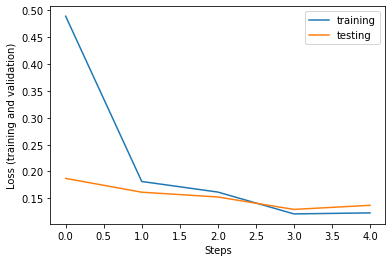

In [ ]:
plt.figure()
plt.ylabel('Loss (training and validation)')
plt.xlabel('Steps')
plt.plot(hist['loss'], label = 'training')
plt.plot(hist['val_loss'], label = 'testing')
plt.legend();

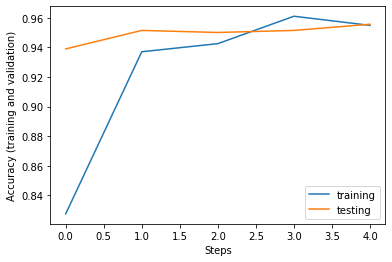

In [ ]:
plt.figure()
plt.ylabel('Accuracy (training and validation)')
plt.xlabel('Steps')
plt.plot(hist['accuracy'], label = 'training')
plt.plot(hist['val_accuracy'], label = 'testing')
plt.legend();

# Testing with images

In [ ]:
X, y = next(iter(test_dataset))

In [ ]:
X

<tf.Tensor: shape=(16, 512, 512, 3), dtype=float32, numpy=
array([[[[0.02019288, 0.02740513, 0.02348356],
         [0.0188285 , 0.02532829, 0.02140673],
         [0.01812445, 0.02439432, 0.02047275],
         ...,
         [0.67094827, 0.5391235 , 0.43359172],
         [0.66939336, 0.5339736 , 0.4331683 ],
         [0.66439295, 0.5257448 , 0.43246055]],

        [[0.01384618, 0.02090367, 0.01687327],
         [0.01002992, 0.01633991, 0.01217319],
         [0.00847668, 0.01468673, 0.01041693],
         ...,
         [0.6650184 , 0.5471155 , 0.43011978],
         [0.6606749 , 0.54193234, 0.42769545],
         [0.6570501 , 0.5374218 , 0.42663643]],

        [[0.00961069, 0.0168685 , 0.01196222],
         [0.00542691, 0.01222473, 0.00693034],
         [0.00544534, 0.01228269, 0.0067994 ],
         ...,
         [0.6493702 , 0.5473809 , 0.43025604],
         [0.635813  , 0.53751785, 0.41879094],
         [0.62853485, 0.53156227, 0.41189685]],

        ...,

        [[0.2053468 , 0.19460014,

In [ ]:
X.shape

TensorShape([16, 512, 512, 3])

In [ ]:
y

<tf.Tensor: shape=(16, 5), dtype=float32, numpy=
array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)>

In [ ]:
image = X[0, :, :, :]
image

<tf.Tensor: shape=(512, 512, 3), dtype=float32, numpy=
array([[[0.02019288, 0.02740513, 0.02348356],
        [0.0188285 , 0.02532829, 0.02140673],
        [0.01812445, 0.02439432, 0.02047275],
        ...,
        [0.67094827, 0.5391235 , 0.43359172],
        [0.66939336, 0.5339736 , 0.4331683 ],
        [0.66439295, 0.5257448 , 0.43246055]],

       [[0.01384618, 0.02090367, 0.01687327],
        [0.01002992, 0.01633991, 0.01217319],
        [0.00847668, 0.01468673, 0.01041693],
        ...,
        [0.6650184 , 0.5471155 , 0.43011978],
        [0.6606749 , 0.54193234, 0.42769545],
        [0.6570501 , 0.5374218 , 0.42663643]],

       [[0.00961069, 0.0168685 , 0.01196222],
        [0.00542691, 0.01222473, 0.00693034],
        [0.00544534, 0.01228269, 0.0067994 ],
        ...,
        [0.6493702 , 0.5473809 , 0.43025604],
        [0.635813  , 0.53751785, 0.41879094],
        [0.62853485, 0.53156227, 0.41189685]],

       ...,

       [[0.2053468 , 0.19460014, 0.18025196],
        [0.16

In [ ]:
y_true = np.argmax(y[0])
y_true

2

In [ ]:
classes[2]

'roses'

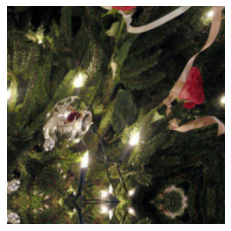

In [ ]:
plt.imshow(image)
plt.axis('off');

In [ ]:
image.shape

TensorShape([512, 512, 3])

In [ ]:
image = np.expand_dims(image, axis = 0)
image.shape

(1, 512, 512, 3)

In [ ]:
prediction = model.predict(image)
prediction

array([[-3.6010792, -3.544305 , -7.1559286,  7.624323 , -4.773508 ]],
      dtype=float32)

In [ ]:
prediction = np.argmax(prediction)
prediction

3

In [ ]:
model.save('/content/model')

INFO:tensorflow:Assets written to: /content/model/assets


INFO:tensorflow:Assets written to: /content/model/assets


In [ ]:
loaded_model = tf.keras.models.load_model('/content/model')

In [ ]:
loaded_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              207615832 
                                                                 
 dropout_2 (Dropout)         (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 207,622,237
Trainable params: 6,405
Non-trainable params: 207,615,832
_________________________________________________________________


In [ ]:
prediction = classes[np.argmax(loaded_model.predict(image))]
prediction

'roses'